Samanalie Perera, 300486075

In [201]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from SimPy.Simulation import *

**Q1a. Write a chisquarevariate(k) function in Python which generates a random variate
from a “χ2k distribution” (chi-square distribution with k degrees of freedom). This is simply the sum of the
squares of k independent standard normal random variates.**

In [202]:
#using Lab3
def chisquarevariate(k):
    """random variate from an chi squared distribution with k degrees of freedom"""
    result = 0.0
    for i in range(k):
        result += random.normalvariate(0,1)**2
    return result

chisquarevariate(3)

2.340933377410175

**b.for each k ∈ {1, 2, 3, 4, 5, 6, 7, 8, 9}, simulate 10000 random variates X ∼ χ2k to estimate E(X) and var(X)**



In [203]:
#using Lab3
def chiestimate(k):
    W = []
    for i in range(10000):
        W.append(chisquarevariate(k))
    return (np.mean(W), np.var(W))

random.seed(1)
for k in [1,2,3,4,5,6,7,8,9]:
    r = chiestimate(k)
    print('k: ', k)
    print("E(X): ",r[0])
    print("Var(X): ", r[1])
    print('2k: ', k*2)

k:  1
E(X):  1.010823328954013
Var(X):  2.056340631286631
2k:  2
k:  2
E(X):  2.000524185148885
Var(X):  4.028118708382056
2k:  4
k:  3
E(X):  3.0387458509386263
Var(X):  6.0015721320591675
2k:  6
k:  4
E(X):  4.021870090417386
Var(X):  8.248851866305564
2k:  8
k:  5
E(X):  5.032357187589926
Var(X):  10.15314004110964
2k:  10
k:  6
E(X):  6.058991701991648
Var(X):  12.276242358204753
2k:  12
k:  7
E(X):  7.00554806619972
Var(X):  13.646895182781648
2k:  14
k:  8
E(X):  7.954802970964434
Var(X):  15.647792165847951
2k:  16
k:  9
E(X):  8.97157154544071
Var(X):  18.047669911314927
2k:  18


**c.Modify your code from part (b) to give a 95% confidence interval for E(X) and a 95%
confidence interval for var(X) from 50 replications.**

In [204]:
#using Lab3
def conf(L):
    """95% confidence interval"""
    lower = np.mean(L) - 1.96*np.std(L)/math.sqrt(len(L))
    upper = np.mean(L) + 1.96*np.std(L)/math.sqrt(len(L))
    return lower, upper

def chiestimate(k):
    W = []
    for i in range(10000):
        W.append(chisquarevariate(k))
    return (np.mean(W), np.var(W))

Lvar1 = []
Lvar2 = []
random.seed(1)
for k in [1,2,3,4,5,6,7,8,9]:
    r = chiestimate(k)
    Lvar1.append(r[0])
    Lvar2.append(r[1])
    
CI = conf(Lvar1)
CI2 = conf(Lvar2)


print("Confidence interval for E(X): ", CI)
print("Confidence interval for Var(X): ", CI2)


Confidence interval for E(X):  (3.3326804300497654, 6.688482887204757)
Confidence interval for Var(X):  (6.6877212464031235, 13.335972752995174)


**d. Compare your results from parts (b) and (c) to the exact values of E(X) and var(X) which
you can find, e.g., on Wikipedia, and comment on your findings.**

The exact value of E(X) is k. This means that when k = 3 (degrees of freedom), the E(X) value ended up being 
3.04 (2dp) which is pretty close to 3. 
The exact value of var(X) is 2*k. This means that when k = 5 (degrees of freedom), the var(X) value ended up being 10.15 (2dp) which is very close to 2 * 5 = 10. 


**2.The number of customers coming to a shop in a day follows a Poisson distribution with a
mean of 22.**

**a. Write Python code to compute analytically the probability of 28 customers coming to that
shop in a day**

In [205]:
num_customers = 28
mean = 22
prob = poisson.pmf(num_customers, mean)
print("The probability of {} customers that come into the shop in a day is {}".format(mean,prob))

The probability of 22 customers that come into the shop in a day is 0.03541731538896103


**b.Write Python code to answer the previous question through simulation by generating
10000 random variates from a Poisson distribution. Plot the frequency of the number of
customers in this simulation. Use random seed = 123 for this question.**

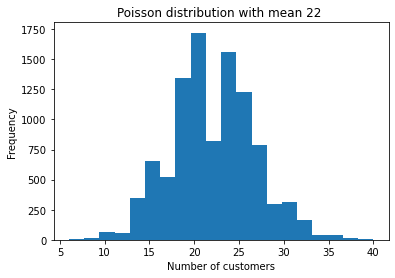

In [206]:
random.seed(123)
mean = 22
prob2 = poisson.rvs(mean, size=10000)

plt.hist(prob2, bins=20)
plt.xlabel("Number of customers")
plt.ylabel("Frequency")
plt.title("Poisson distribution with mean 22 ")
plt.show()


**3.Write a SimPy simulation program to describe the following behaviours of a visitor named
Kathy at an unpopular Museum, assuming that no other visitors arrive while Kathy is there:
Kathy enters the empty museum at time 0. There are three displays, numbered 0, 1, and 2. She
only has time to see two of them. She first goes to display 0 and looks at it. When she leaves
it, she chooses display 1 with probability p = 0.4 and display 2 with probability (1 − p). The
times taken to look at the three displays are displayTime = [4.5, 5.5, 7.5], respectively.
She says, “Look, number i” (where i is the display number) when she goes to a display. Use a
random seed of 123**

In [207]:
#using lab 4
## Model components --------------------
class Kathy(Process):
    """An art lover"""
    
    def visit(self):
        print(now(), 'Kathy enters the museum')
        for picture in range(2):
            #randomly choosing from three displays
            random.choice(Npictures)
            display1 = picture
            print(now(), 'Kathy goes to display',display1)
            yield hold, self, displayTime[display1]
            print(now(), 'Kathy looks at display', display1)
            
            #if the random number is less than the prob, she goes to 1 display
            if random.random() < prob:
                display1 = 1
            #else she will go to the other display    
            else:
                display1 = 2
        print(now(), 'Kathy leaves the museum')
    
    
## Experiment data ----------------------
random.seed(123)
Npictures = [0,1,2]
displayTime = [4.5,5.5,7.5]
prob = 0.4

## Experiment ---------------------------
initialize()
kathy = Kathy('Kathy')
activate(kathy, kathy.visit(), now())
simulate(until=sum(displayTime))

0 Kathy enters the museum
0 Kathy goes to display 0
4.5 Kathy looks at display 0
4.5 Kathy goes to display 1
10.0 Kathy looks at display 1
10.0 Kathy leaves the museum


'SimPy: No more events at time 10.0'